# Car Price Prediction using Machine Learning

## Objective
The objective of this project is to predict the selling price of a car
based on various features such as year, mileage, fuel type, and transmission
using a regression model.



In [157]:

#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
df=pd.read_csv("car data.csv") #loading dataset

In [159]:
df.head() #printing first few rows to see data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [160]:
df.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Dealer       Manual      0  
4         Dealer       Manual      0  
..           ...          ...    ...  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  

[301 rows x 9 columns]>

In [161]:
df.size # it shows the size of dataset

2709

In [162]:
df.isnull().sum() #this gives the sum of null values here no null entities are present

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [163]:
column=df['Selling_type']

In [164]:
column

,Selling_type
0,Dealer
1,Dealer
2,Dealer
3,Dealer
4,Dealer
...,...
296,Dealer
297,Dealer
298,Dealer
299,Dealer


In [165]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

Instead of using Year, we convert it to Car Age
(because price depends on how old the car is).

In [166]:
current_year = 2025
df['Car_Age'] = current_year - df['Year']
df.drop('Year', axis=1, inplace=True)
df.head()



,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [167]:
# to convert categorical values into numerical values
df = pd.get_dummies(df, drop_first=True)
df.head()


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,4.75,9.54,43000,0,12,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,7.25,9.85,6900,0,8,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2.85,4.15,5200,0,14,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,4.60,6.87,42450,0,11,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [168]:
# splitting columns into target variable and independent variable
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [169]:
X

,Present_Price,Driven_kms,Owner,Car_Age,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,11,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,9.54,43000,0,12,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,9.85,6900,0,8,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,4.15,5200,0,14,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,6.87,42450,0,11,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,11.60,33988,0,9,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
297,5.90,60000,0,10,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
298,11.00,87934,0,16,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
299,12.50,9000,0,8,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [170]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [172]:
X_train

,Present_Price,Driven_kms,Owner,Car_Age,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
129,0.84,5000,0,8,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
232,14.79,12900,0,10,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
195,0.32,35000,0,10,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,True
277,13.60,21780,0,10,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
280,5.90,14465,0,10,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.57,18000,0,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
71,12.48,45000,0,14,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
106,3.45,16500,1,11,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
270,10.00,69341,0,14,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [173]:
# building linear regression model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [174]:
y_pred = lr_model.predict(X_test)
y_pred


array([ 7.40519143,  9.62589966,  5.59697935, -0.41175761,  8.60551227,
        6.76568348,  1.48133859,  6.22241315,  0.98852264,  6.72163914,
       15.78731749,  0.28802883,  7.79711246,  8.00883609,  6.22035446,
        2.86919736,  2.7317876 , 11.05114131,  7.77339919,  8.5927177 ,
        5.53054308,  7.60999365,  5.66128911,  1.76615352,  6.25188622,
        3.49759064,  5.43411431,  1.5324271 ,  2.69323634,  3.48770991,
       -0.04084614,  9.21602832, -2.36677758,  1.99886881,  8.43003067,
        4.00071461,  6.0669626 ,  6.20030708,  4.32859511,  6.77282009,
        5.35541895,  8.41893323,  3.66167682,  0.26893365, 13.18392137,
        0.04172763,  8.38113373,  9.63032956,  3.90988188,  4.09501758,
        5.84085883,  2.70926847, 22.95102467, 20.76151759,  7.35933853,
        9.81724321,  4.61297027,  8.9556279 , -0.11318666,  6.61971135,
        3.70457629, -0.58408262,  1.09822023,  2.53537728,  5.02642588,
        3.50931844, 22.37644301, 19.61271652,  5.6815992 ,  4.24

In [175]:
# model evaluation
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score is :", r2)
print("Mean Absolute Error (MAE) is :", mae)


R2 Score is : 0.6836900362239244
Mean Absolute Error (MAE) is : 2.0107064076932315


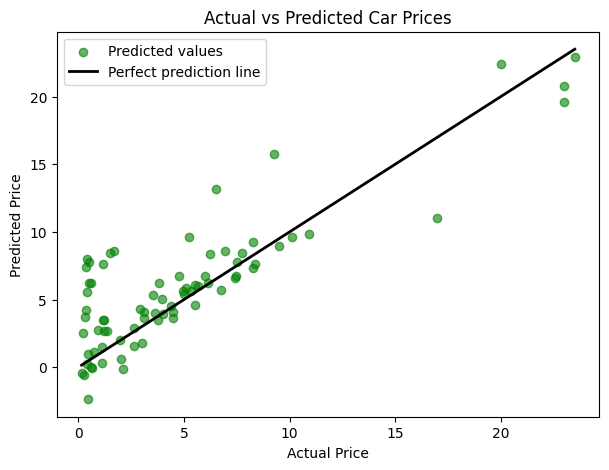

In [177]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6, label='Predicted values')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='black', linewidth=2, label='Perfect prediction line')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()


The scatter plot compares actual and predicted car prices.
The red straight line represents perfect predictions. Most data points
lying close to this line indicate that the model performs well.

In [178]:
X.columns

Index(['Present_Price', 'Driven_kms', 'Owner', 'Car_Age', 'Car_Name_Activa 3g',
       'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       'Car_Name_Bajaj Avenger 220',
       ...
       'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object', length=105)

To predict car price based on given input data

In [179]:
import numpy as np
import pandas as pd

# creating an empty dataframe with same columns as X
input_data = pd.DataFrame(
    np.zeros((1, X.shape[1])),
    columns=X.columns
)


In [180]:
input_data['Present_Price'] = 10
input_data['Driven_kms'] = 140000
input_data['Owner'] = 0
input_data['Car_Age'] = 16

# Car name
input_data['Car_Name_Activa 4g'] = 1

# Fuel type
input_data['Fuel_Type_Petrol'] = 1

# Seller type
input_data['Selling_type_Individual'] = 1

# Transmission
input_data['Transmission_Manual'] = 1


In [181]:
predicted_price = lr_model.predict(input_data)
print("Predicted Selling Price (in lakhs):", predicted_price[0])


Predicted Selling Price (in lakhs): 8.691547334264865


This model does not give realistic selling price hence we will use random forest regressor for realistic price prediction

In [182]:
from sklearn.ensemble import RandomForestRegressor


In [183]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [184]:
y_pred_rf = rf_model.predict(X_test)


In [185]:
y_pred_rf

array([ 0.42345, 10.2657 ,  5.04425,  0.20115,  7.43435,  6.94675,
        1.0707 ,  0.5738 ,  0.46515,  6.491  ,  7.7135 ,  1.00635,
        7.96535,  0.46415,  5.43875,  2.6415 ,  1.11375, 13.6218 ,
        0.47395,  1.57975,  0.3251 ,  7.80355,  4.7935 ,  2.8775 ,
        0.5082 ,  4.01825,  5.35575,  3.0875 ,  1.17155,  1.19005,
        0.5228 ,  8.78245,  0.4739 ,  2.5825 ,  7.6588 ,  4.111  ,
        6.2698 ,  5.99665,  2.64775,  6.39985,  4.97765,  3.5146 ,
        4.82275,  0.54905,  6.328  ,  0.75895,  8.03525,  6.822  ,
        2.92275,  4.025  ,  4.95375,  1.51355, 23.16865, 20.5139 ,
        6.51775, 10.1036 ,  5.18575,  8.4994 ,  2.96525,  6.52345,
        0.21775,  0.2363 ,  0.81105,  0.4739 ,  4.566  ,  1.13125,
       22.4529 , 21.3644 ,  6.621  ,  0.4932 ,  3.75075,  3.16625,
        5.87225,  4.568  ,  2.8475 ,  1.02575])

In [186]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest R2 Score:", r2_rf)
print("Random Forest MAE:", mae_rf)


Random Forest R2 Score: 0.9692975500586366
Random Forest MAE: 0.5877342105263146


In [187]:
print("Linear Regression R2:", r2)
print("Linear Regression MAE:", mae)
print("Random Forest R2:", r2_rf)
print("Random Forest MAE:", mae_rf)


Linear Regression R2: 0.6836900362239244
Linear Regression MAE: 2.0107064076932315
Random Forest R2: 0.9692975500586366
Random Forest MAE: 0.5877342105263146


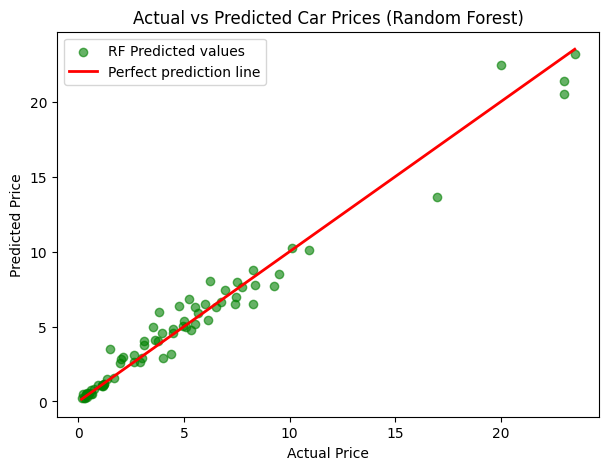

In [188]:
plt.figure(figsize=(7, 5))

# Scatter plot (Actual vs Predicted using Random Forest)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label='RF Predicted values')

# Straight line (Ideal prediction: y = x)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linewidth=2,
    label='Perfect prediction line'
)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.legend()
plt.show()


In [189]:
rf_predicted_price = rf_model.predict(input_data)
print("Random Forest Predicted Price (in lakhs):", rf_predicted_price[0])


Random Forest Predicted Price (in lakhs): 2.907800000000001


In [190]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
Present_Price,0.868919
Car_Age,0.061017
Driven_kms,0.031186
Transmission_Manual,0.006946
Car_Name_land cruiser,0.005025
Car_Name_innova,0.003798
Car_Name_city,0.003759
Selling_type_Individual,0.003695
Car_Name_corolla altis,0.003074
Fuel_Type_Diesel,0.003026


## Model Improvement Using Random Forest
To improve prediction accuracy and handle non-linear relationships,
a Random Forest Regressor was implemented. Compared to Linear Regression,
the Random Forest model achieved better performance with higher R² score
and lower MAE. This demonstrates the effectiveness of ensemble learning
methods for complex regression problems like car price prediction.
